In [39]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import matplotlib as mp
# import gaia_tools as gt
import scipy
from scipy.ndimage import gaussian_filter
import astropy.units as u
from astropy.coordinates import SkyCoord
import math

sys.path.append('C:/gaiaenv/New Py/My_thesis/Modules')
from mock_wake import generate_mock_wake
from rotation_funcs import rotate, angle_finder, rz, ry, rx

In [40]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np
# from matplotlib import cm
# import matplotlib as mp
# # import gaia_tools as gt
# import scipy
# from scipy.ndimage import gaussian_filter
# import astropy.units as u
# from astropy.coordinates import SkyCoord
# import math

In [41]:
# #-----------------------------------------------------------------------------------------------------------------
# # 3D rotation matrixes
# def rx(theta):
#     c, s = np.cos(theta), np.sin(theta)
#     return np.array([[1, 0, 0],
#                      [0, c,-s],
#                      [0, s, c]])
# def ry(theta):
#     c, s = np.cos(theta), np.sin(theta)
#     return np.array([[ c, 0, s],
#                      [ 0, 1, 0],
#                      [-s, 0, c]])
# def rz(theta):
#     c, s = np.cos(theta), np.sin(theta)
#     return np.array([[c,-s, 0],
#                      [s, c, 0],
#                      [0, 0, 1]])

# def rotate(rot_mat, vec):
#     return rot_mat @ vec

# #-----------------------------------------------------------------------------------------------------------------

# extent = [-60, 60, -60, 60]
# def plot_OD_gaussian(x, y, bins, sigma, title, xaxis, yaxis): # x coord, y coord, nr of bins, extent of plot, sigma for gaussian filter, title of plot, x axis title, y axis title
#     fig,ax = plt.subplots()
    
#     def overdensity(x, y, bins):  # generating the overdensity map
#         pre_OD, xedges, yedges = np.histogram2d(x, y, bins)
#         OD = (pre_OD / np.mean(pre_OD)-1)
#         return OD, xedges, yedges
    
#     OD, xedges, yedges = overdensity(x, y, bins) # calling out the function
#     im = ax.imshow(OD.T, origin='lower', cmap = "seismic")
#     c = plt.colorbar(im, ax=ax)
#     plt.title(str(title))
#     plt.xlabel(str(xaxis))
#     plt.ylabel(str(yaxis))
#     c.set_label('difference from average star density', rotation=270, labelpad=20)
#     hist_smoothed = gaussian_filter(OD.T, sigma=sigma)
#     image = plt.imshow(hist_smoothed, origin='lower', extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap="seismic")
#     return image

# #-----------------------------------------------------------------------------------------------------------------
# def angle_between(v1, v2):
#     v1_v2 = np.dot(v1, v2)
#     mag_v1 = np.linalg.norm(v1)
#     mag_v2 = np.linalg.norm(v2)
#     angle_Z = np.arccos(v1_v2 / (mag_v1 * mag_v2))
#     return np.degrees(angle_Z)

# #-----------------------------------------------------------------------------------------------------------------
# # This function finds the angles of rotation around the z and y axes 
# def angle_finder(LMC_velocity_components): # x, y, and z components of the LMC velocity vector
#     vel_vec_x =(42, 0, 0) # random vector pointing towards x axis. x = 42 because it is the answer to the ultimate question of life, the universe and everything.
#     v_LMC = LMC_velocity_components
#     Rz = angle_between([vel_vec_x[0], vel_vec_x[1]], [v_LMC[0], v_LMC[1]]) # angle between the two vectors in 2D
    
#         # -------------------------------------------------------------------------#
#     if (((v_LMC[0] < 0) & (v_LMC[1] <= 0 )) | ((v_LMC[0] > 0) & (v_LMC[1] <= 0))):
#         Rz = -Rz
#     else:
#         Rz = Rz
#         # -------------------------------------------------------------------------#  
           
#     rotated_2D = rotate(rz(np.radians(Rz)), vel_vec_x) # rotation matrix around z axis

#     Ry = angle_between(rotated_2D, v_LMC) # angle between the two vectors in 3D
        
#         # -------------------------------------------------------------------------#
#     if (((v_LMC[0] < 0) & (v_LMC[2] >= 0 )) | ((v_LMC[0] > 0) & (v_LMC[2] <= 0 ))): # to determine the direction of rotation
#         Ry = -Ry
#     else:
#         Ry = Ry
#         # -------------------------------------------------------------------------#
#     print(f"Rz = {Rz}, Ry = {Ry}")
#     return Rz, Ry


In [42]:
# # Mock wake generator
# def generate_mock_wake(
    
#     N_total=100_000,
#     box_half_size=300.0,                 # kpc; box is [-L, L]^3
#     f_overdense=0.99,                  # fraction of particles in wake component
#     mu=(-60.0, 0.0, 0.0),                # kpc; wake center (x0, y0, z0)
#     sigma_major=80.0,                    # kpc; wake length-scale along major axis
#     sigma_minor=40.0,                    # kpc; width in the orthogonal in-plane axis
#     sigma_z=40.0,                         # kpc; thickness
#     theta_deg=0.0,                       # rotation of wake in XY plane (deg)
#     rng_seed=7
# ):
#     """
#     Return a structured ndarray with fields: x,y,z,component (1=wake, 0=bg).
#     """
#     rng = np.random.default_rng(rng_seed)
#     N_over = int(N_total * f_overdense)
#     N_bg   = N_total - N_over
#     mu = np.asarray(mu, dtype=float)

#     # Rotation in the XY plane
#     theta = np.deg2rad(theta_deg)
#     c, s = np.cos(theta), np.sin(theta)
#     R = np.array([[c, -s],
#                   [s,  c]])

#     # Covariance in XY for the anisotropic Gaussian
#     Lambda_xy = np.diag([sigma_major**2, sigma_minor**2])
#     Sigma_xy  = R @ Lambda_xy @ R.T

#     # Wake samples
#     xy_over = rng.multivariate_normal(mean=mu[:2], cov=Sigma_xy, size=N_over)
#     z_over  = rng.normal(loc=mu[2], scale=sigma_z, size=N_over)

#     # Clip to keep inside box
#     xy_over[:, 0] = np.clip(xy_over[:, 0], -box_half_size, box_half_size)
#     xy_over[:, 1] = np.clip(xy_over[:, 1], -box_half_size, box_half_size)
#     z_over        = np.clip(z_over,        -box_half_size, box_half_size)

#     # Uniform background
#     x_bg = rng.uniform(-box_half_size, box_half_size, size=N_bg)
#     y_bg = rng.uniform(-box_half_size, box_half_size, size=N_bg)
#     z_bg = rng.uniform(-box_half_size, box_half_size, size=N_bg)

#     # Concatenate positions
#     x = np.concatenate([xy_over[:, 0], x_bg])
#     y = np.concatenate([xy_over[:, 1], y_bg])
#     z = np.concatenate([z_over,        z_bg])

#     # Pack catalog
#     comp = np.concatenate([np.ones(N_over, dtype=np.int8),
#                            np.zeros(N_bg, dtype=np.int8)])  # 1=wake, 0=bg
    

#     cat = np.zeros(N_total, dtype=[('x','f4'),('y','f4'),('z','f4'),('component','i1')])
    
#     cat['x'], cat['y'], cat['z']   = x, y, z
#     cat['component'] = comp
#     return cat


In [43]:
file = 'C:/Data/Praktika_data/trajlmc.txt'
orbit = pd.read_csv(file, delimiter=' ')
orbit[orbit.time < 0]

today_orbit = orbit.iloc[400]

#Definig the current day velocity and position of the LMC
today = np.array([today_orbit['Vx'], today_orbit['Vy'], today_orbit['Vz']])
origin = np.array([today_orbit['x'], today_orbit['y'], today_orbit['z']])


# This helps to regulate the vecotr length of the LMC velocity arrow
vx, vy, vz = today_orbit['Vx'], today_orbit['Vy'], today_orbit['Vz']
factor = 150  # how long you want the arrow in kpc-units space
length = (vx**2 + vy**2 + vz**2)**0.5
Ux, Uy, Uz = vx/length * factor, vy/length * factor, vz/length * factor
speed = np.array([Ux, Uy, Uz]) 

In [44]:
result = generate_mock_wake()

x_sim = result['x']
y_sim = result['y']
z_sim = result['z']

LMC_sim = np.array([x_sim-120, y_sim, z_sim]).T

angle_z, angle_y = angle_finder(today)
R = rz(np.radians(angle_z)) @ ry(np.radians(angle_y))

LMC_sim_rot = R @ LMC_sim.T
LMC_sim_rot = LMC_sim_rot.T

NameError: name 'np' is not defined

In [ ]:
wake_coords = SkyCoord(LMC_sim_rot[:,0],
                        LMC_sim_rot[:,1],
                        LMC_sim_rot[:,2], 
                        frame = 'galactocentric', 
                        unit='kpc', 
                        representation_type='cartesian')

orbit_coords = SkyCoord(orbit['x'], 
                        orbit['y'], 
                        orbit['z'], 
                        frame = 'galactocentric', 
                        unit='kpc', 
                        representation_type='cartesian')

lmc_pos = SkyCoord(origin[0],
                    origin[1],
                    origin[2],
                    frame = 'galactocentric',
                    unit='kpc',
                    representation_type='cartesian')


c:\gaiaenv\New Py\My_thesis\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


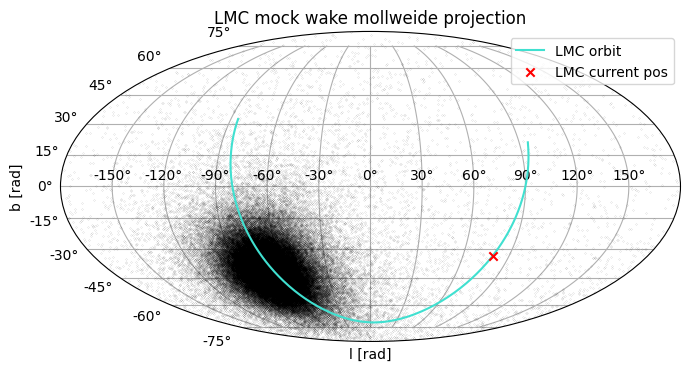

In [ ]:
plt.figure(figsize=(8, 4.5))
ax = plt.subplot(111, projection="mollweide")

ax.plot(-wake_coords.galactic.l.wrap_at(180*u.deg).radian, 
        wake_coords.galactic.b.radian, 'k.', 
        markersize = 0.1 ,zorder = 2)

ax.plot(-orbit_coords.galactic.l.wrap_at(180*u.deg).radian, 
           orbit_coords.galactic.b.radian,  color = 'turquoise',
           label = 'LMC orbit', zorder = 3)

ax.scatter(-lmc_pos.galactic.l.wrap_at(180*u.deg).radian, 
           lmc_pos.galactic.b.radian, marker = 'x', color = 'red',
           label='LMC current pos', zorder = 4)


ax.grid(True)
ax.set_xlabel('l [rad]')
ax.set_ylabel('b [rad]')
ax.set_title('LMC mock wake mollweide projection')
ax.legend(loc='upper right')
plt.legend()
plt.show()